In [19]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms, datasets
import pathlib
import numpy as np
# import cv2 as cv
import time
import os

/lustre/grp/bitcap/xiacr/deeplearning/class2022/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/lustre/grp/bitcap/xiacr/deeplearning/class2022/conda/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [3]:
train_dir = "./data/Vegetable/train"
test_dir = "./data/Vegetable/train"
validation_dir = "./data/Vegetable/validation"

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [4]:
# Method1: use ImageFolder
train_augs = transforms.Compose([
    transforms.RandomResizedCrop(size=224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
test_augs = transforms.Compose([
    transforms.Resize(size=256),
    transforms.CenterCrop(size=224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
train_set = datasets.ImageFolder(train_dir, transform=train_augs)
test_set = datasets.ImageFolder(test_dir, transform=test_augs)

batch_size = 32
train_iter = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_iter = DataLoader(test_set, batch_size=batch_size)

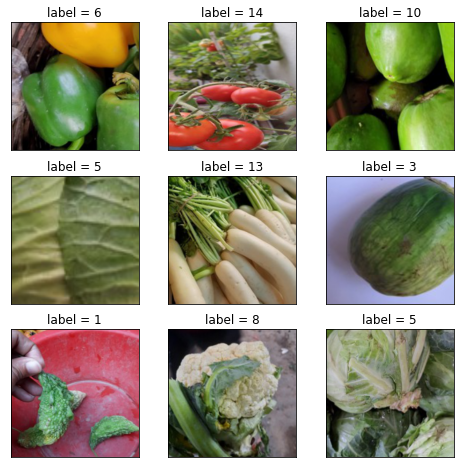

In [7]:
# random show 9 pictures
import random
from matplotlib import pyplot as plt
def denorm(img):
    for i in range(img.shape[0]):
        img[i] = img[i] * std[i] + mean[i]
    return img
plt.figure(figsize=(8, 8))
for i in range(9):
    img, label = train_set[random.randint(0, len(train_set))]
    img = denorm(img)
    img = img.permute(1, 2, 0)
    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(img.numpy())
    ax.set_title("label = %d" % label)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


In [ ]:
# Method2: define a class to load data(not test yet)
class Vegatable(Dataset):
    def __init__(self, path):
        data_root = pathlib.Path(path)
        all_image_paths = list(data_root.glob('*/*'))
        self.all_image_paths = [str(path) for path in all_image_paths]
        label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
        label_to_index = dict((label, index) for index, label in enumerate(label_names))
        self.all_image_labels = [label_to_index[path.parent.name] for path in all_image_paths]
        self.mean = np.array(mean).reshape((1, 1, 3))
        self.std = np.array(std).reshape((1, 1, 3))

    def __getitem__(self, index):
        img = cv.imread(self.all_image_paths[index])
        img = cv.resize(img, (224, 224))
        img = img / 255.
        img = (img - self.mean) / self.std
        img = np.transpose(img, [2, 0, 1])
        label = self.all_image_labels[index]
        img = torch.tensor(img, dtype=torch.float32)
        label = torch.tensor(label)
        return img, label

    def __len__(self):
        return len(self.all_image_paths)

In [14]:
class father(object):
    def __init__(self,name = 'default_name',age = 0):
        self.name = name
        self.age = age
    def hi():
        print("hi")
        
class son(father):
    def __init__(self,name):
        self.name = name
        super().__init__()
        # self.name = name
        pass
        

In [15]:
boy = son(name  = 'babe')

In [16]:
boy.name

'default_name'

In [26]:
# test my own Dataset
class VegetablePic(datasets.ImageFolder):
    r'''
    Special data loader for homework vegetable picture dataset,
    Directly inherit from torchvision.datasets.ImageFolder
    -------
    Paras
        mode: ['train','test', 'validation']
    -------
    Note: can not change the class name
    '''
    file_path = './data/Vegetable/'
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    
    def __init__(self, mode):
        # super().__init__()
        self.root = os.path.join(VegetablePic.file_path, mode)
        if mode == 'train':
            self.transform  = transforms.Compose([
                                transforms.RandomResizedCrop(size=224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize(VegetablePic.mean, VegetablePic.std)
                                ])
        elif mode == 'test' or mode == 'validation':
            self.transform = transforms.Compose([
                        transforms.Resize(size=256),
                        transforms.CenterCrop(size=224),
                        transforms.ToTensor(),
                        transforms.Normalize(VegetablePic.mean, VegetablePic.std)
                        ])
        super().__init__(root=self.root, transform=self.transform)
        

In [27]:
train_set = VegetablePic(mode='train')